## Observations and Insights

## Dependencies and starter code

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)



In [31]:
# Combine the data into a single dataset
# mouse_metadata.head()
# study_results.head()
combined = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# group combined set by drug regimen
drug_groups = combined.groupby("Drug Regimen")

# create new DF with variables to calculate above values
summary_table = pd.DataFrame({
    "Mean Tumor Vol": drug_groups["Tumor Volume (mm3)"].mean(),
    "Median Tumor Vol": drug_groups["Tumor Volume (mm3)"].median(),
    "Tumor Vol Variance": drug_groups["Tumor Volume (mm3)"].var(),
    "Tumor Vol Std Dev": drug_groups["Tumor Volume (mm3)"].std(),
    "Tumor Vol SEM": drug_groups["Tumor Volume (mm3)"].sem()
})

# print DF
summary_table

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

In [33]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
counts = combined['Drug Regimen'].value_counts()
counts


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

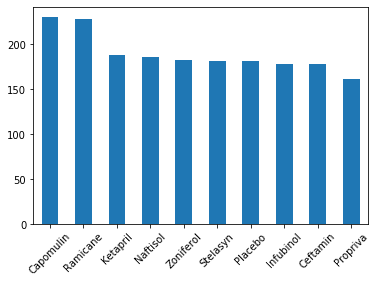

In [34]:
#creates graph
counts.plot.bar(rot=45)

Text(0.5, 0, 'Drug Name')

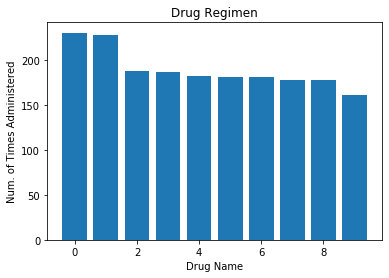

In [36]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_name = ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol","Stelasyn","Placebo","Infubinol","Ceftamin","Propriva"]
drug_adm = [230,228,188,186,182,181,181,178,178,161]
x_axis = np.arange(len(drug_adm))
plt.bar(x_axis, drug_adm)

# create title and labels
plt.title("Drug Regimen")
plt.ylabel("Num. of Times Administered")
plt.xlabel("Drug Name")

## Pie plots

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_counts = combined['Sex'].value_counts()
sex_counts

Male      958
Female    935
Name: Sex, dtype: int64

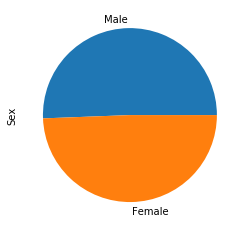

In [47]:
sex_counts.plot.pie()

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# build data for chart
sex = ["Male","Female"]
sex_num = [958,935]
colors = ["blue","orange"]
explode = [0.1,0]

(-1.2076939577793158,
 1.1101719390349558,
 -1.1065652022428258,
 1.1003126286782299)

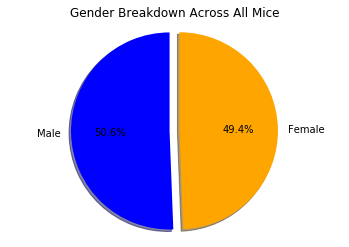

In [56]:
# create chart
plt.pie(sex_num, explode=explode, labels=sex, colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)

# add title to chart
plt.title("Gender Breakdown Across All Mice")

# keeps circle proportionate
plt.axis("equal")

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [9]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [10]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen